In [ ]:
# Importation des packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats


from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [ ]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')


In [3]:
!pip install plotly

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import plotly.express as px

# PRETRAITEMENT ET TRAITEMENT DES DONNEES

In [ ]:
# Collecte des données : Importation du dataset
kidney =pd.read_csv('kidney_disease.csv')
kidney.head()

In [ ]:
# Exploration préliminaire
print(kidney.shape)
print(kidney.columns)
print(kidney.dtypes)

In [7]:
# Renommons les colonnes pour une meilleure

kidney.columns = ['id','age','blood_pressure','specific_gravity', 'albumin','sugar','red_blood_cells','pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

In [ ]:
kidney.head()

In [ ]:
#Recherche des valeurs manquantes
kidney.isnull().sum().sort_values(ascending= False)

In [ ]:
#suppression de la colone id
kidney.drop(["id"],axis=1,inplace=True)

In [ ]:
kidney.head()

Les colonnes'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' sont de type  object . Nous devons les convertir en type nummérique.

In [ ]:
# Convertissons les types des colonnes en numeriques
kidney.packed_cell_volume = pd.to_numeric(kidney.packed_cell_volume, errors='coerce')
kidney.red_blood_cell_count = pd.to_numeric(kidney.red_blood_cell_count, errors='coerce')
kidney.white_blood_cell_count = pd.to_numeric(kidney.white_blood_cell_count, errors='coerce')

In [ ]:
kidney.dtypes

In [14]:
# Informations statistiques sur les caractéristiques utilisées dans l'ensemble de données
kidney.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  packed_cell_volume  white_blood_cell_count  \
count  312.000000   348.000000          329.000000              294.000000   
mean     4.627244    12.526437           38.884498             8406.122449   
std      3.193904     2.912587            8.990105             2944.474190   
min      2.500000     3.100000            9.000000             2200.000000   
25%      3.800000    10.300000           32.000000             6500.000000   
50%      4.400000    12.650000           40.000000             8000.000000   
75%      4.900000    15.000000           45.000000             9800.000000   
max     47.000000    17.800000           54.000000            26400.000000   

       red_blood_cell_count  
count            269.000000  
mean               4.707435  
std                1.025323  
min                2.100000  
25%                3.900000  
50%                4.800000  
75%                5.400000  
max                8.000000

In [15]:
# Extraction de colonnes catégorielles et numériques

cat_cols = [col for col in kidney.columns if kidney[col].dtype == 'object']
num_cols = [col for col in kidney.columns if kidney[col].dtype != 'object']

print(cat_cols)
print(num_cols)


['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [16]:
# Affichage des valeur uniques dans les colonnes catégorielles

for col in cat_cols:
    print(f"{col} possède {kidney[col].unique()} valeurs\n")

red_blood_cells possède [nan 'normal' 'abnormal'] valeurs

pus_cell possède ['normal' 'abnormal' nan] valeurs

pus_cell_clumps possède ['notpresent' 'present' nan] valeurs

bacteria possède ['notpresent' 'present' nan] valeurs

hypertension possède ['yes' 'no' nan] valeurs

diabetes_mellitus possède ['yes' 'no' ' yes' '\tno' '\tyes' nan] valeurs

coronary_artery_disease possède ['no' 'yes' '\tno' nan] valeurs

appetite possède ['good' 'poor' nan] valeurs

pedal_edema possède ['no' 'yes' nan] valeurs

anemia possède ['no' 'yes' nan] valeurs

class possède ['ckd' 'ckd\t' 'notckd'] valeurs



 Les colonnes  diabetes_mellitus, coronary_artery_disesase presentent des valeurs incorrectessont présentes telle que :  \\tyes et \\tno. Nous devons les corriger

In [17]:

kidney['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

kidney['coronary_artery_disease'] = kidney['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

kidney['class'] = kidney['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [18]:
for col in cat_cols:
    print(f"{col} possède {kidney[col].unique()} valeurs uniques\n")

red_blood_cells possède [nan 'normal' 'abnormal'] valeurs uniques

pus_cell possède ['normal' 'abnormal' nan] valeurs uniques

pus_cell_clumps possède ['notpresent' 'present' nan] valeurs uniques

bacteria possède ['notpresent' 'present' nan] valeurs uniques

hypertension possède ['yes' 'no' nan] valeurs uniques

diabetes_mellitus possède ['yes' 'no' nan] valeurs uniques

coronary_artery_disease possède ['no' 'yes' nan] valeurs uniques

appetite possède ['good' 'poor' nan] valeurs uniques

pedal_edema possède ['no' 'yes' nan] valeurs uniques

anemia possède ['no' 'yes' nan] valeurs uniques

class possède ['ckd' 'not ckd'] valeurs uniques



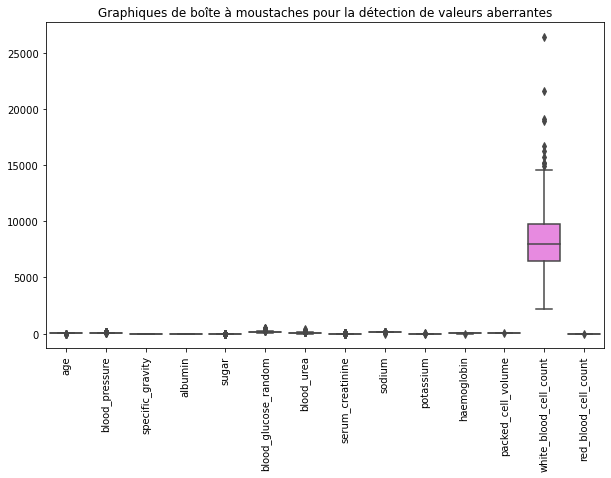

In [19]:
#Identification des valeurs abérrantes

# Créer un graphique de boîte à moustaches pour chaque colonne de données
plt.figure(figsize=(10, 6))
sns.boxplot(data=kidney)
plt.title("Graphiques de boîte à moustaches pour la détection de valeurs aberrantes")
plt.xticks(rotation=90)  # Rotation des noms de colonnes pour une meilleure lisibilité
plt.show()


In [20]:
# Identification des valeurs abérrantes pour les variables numériques
from scipy import stats

threshold = 3  # Seuil pour définir ce qui est considéré comme aberrant, pratique courante
#Cela signifie que toute valeur ayant un z-score supérieur à 3 ou inférieur à -3 est considérée comme aberrante. Un z-score de 3 correspond à environ trois écarts-types de la moyenne, et il est couramment utilisé pour identifier des valeurs qui se situent loin de la moyenne.
for col in num_cols:
    z_scores = stats.zscore(kidney[col])
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    print(f"Outliers in {col}:", kidney[outliers][col])


Outliers in age: Series([], Name: age, dtype: float64)
Outliers in blood_pressure: Series([], Name: blood_pressure, dtype: float64)
Outliers in specific_gravity: Series([], Name: specific_gravity, dtype: float64)
Outliers in albumin: Series([], Name: albumin, dtype: float64)
Outliers in sugar: Series([], Name: sugar, dtype: float64)
Outliers in blood_glucose_random: Series([], Name: blood_glucose_random, dtype: float64)
Outliers in blood_urea: Series([], Name: blood_urea, dtype: float64)
Outliers in serum_creatinine: Series([], Name: serum_creatinine, dtype: float64)
Outliers in sodium: Series([], Name: sodium, dtype: float64)
Outliers in potassium: Series([], Name: potassium, dtype: float64)
Outliers in haemoglobin: Series([], Name: haemoglobin, dtype: float64)
Outliers in packed_cell_volume: Series([], Name: packed_cell_volume, dtype: float64)
Outliers in white_blood_cell_count: Series([], Name: white_blood_cell_count, dtype: float64)
Outliers in red_blood_cell_count: Series([], Name

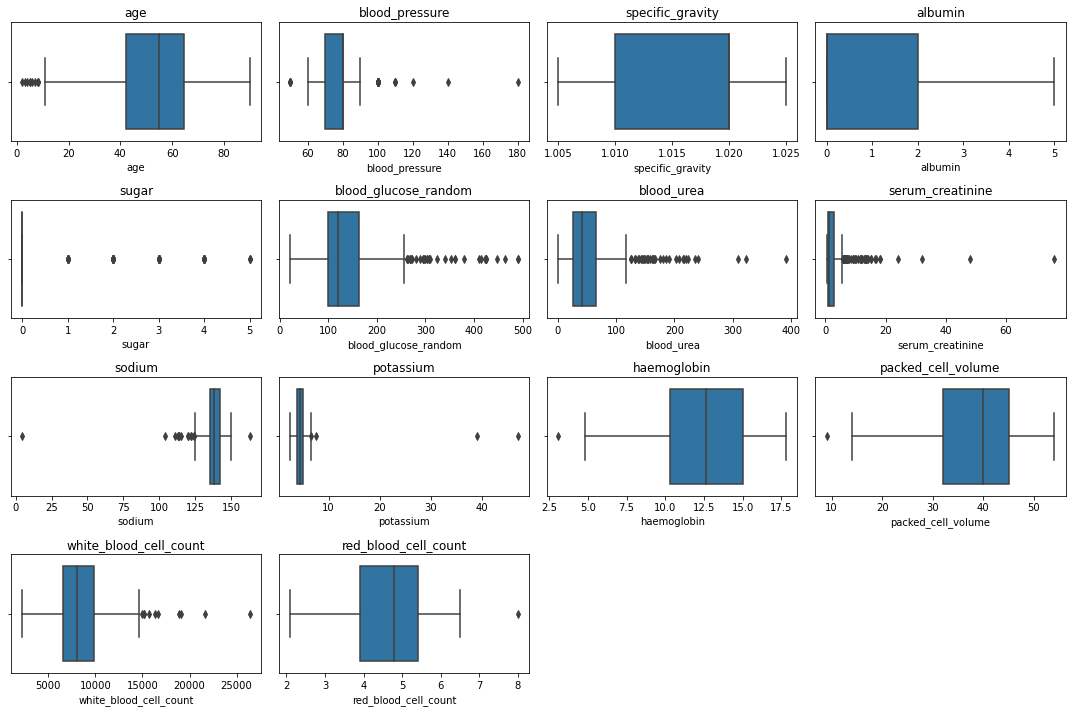

In [21]:

# Sélectionner les colonnes numériques
num_cols = [col for col in kidney.columns if kidney[col].dtype != 'object']

# Créer des graphiques de boîte à moustaches pour chaque colonne numérique
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=kidney[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


In [22]:
#Identification des valeurs abérrantes pour les variables catégorielles
occurrence_threshold = 10  # Seuil pour définir ce qui est considéré comme une occurrence rare

for col in cat_cols:
    value_counts = kidney[col].value_counts()
    rare_values = value_counts[value_counts < occurrence_threshold].index
    print(f"Rare values in {col}:", kidney[kidney[col].isin(rare_values)][col])


Rare values in red_blood_cells: Series([], Name: red_blood_cells, dtype: object)
Rare values in pus_cell: Series([], Name: pus_cell, dtype: object)
Rare values in pus_cell_clumps: Series([], Name: pus_cell_clumps, dtype: object)
Rare values in bacteria: Series([], Name: bacteria, dtype: object)
Rare values in hypertension: Series([], Name: hypertension, dtype: object)
Rare values in diabetes_mellitus: Series([], Name: diabetes_mellitus, dtype: object)
Rare values in coronary_artery_disease: Series([], Name: coronary_artery_disease, dtype: object)
Rare values in appetite: Series([], Name: appetite, dtype: object)
Rare values in pedal_edema: Series([], Name: pedal_edema, dtype: object)
Rare values in anemia: Series([], Name: anemia, dtype: object)
Rare values in class: Series([], Name: class, dtype: object)


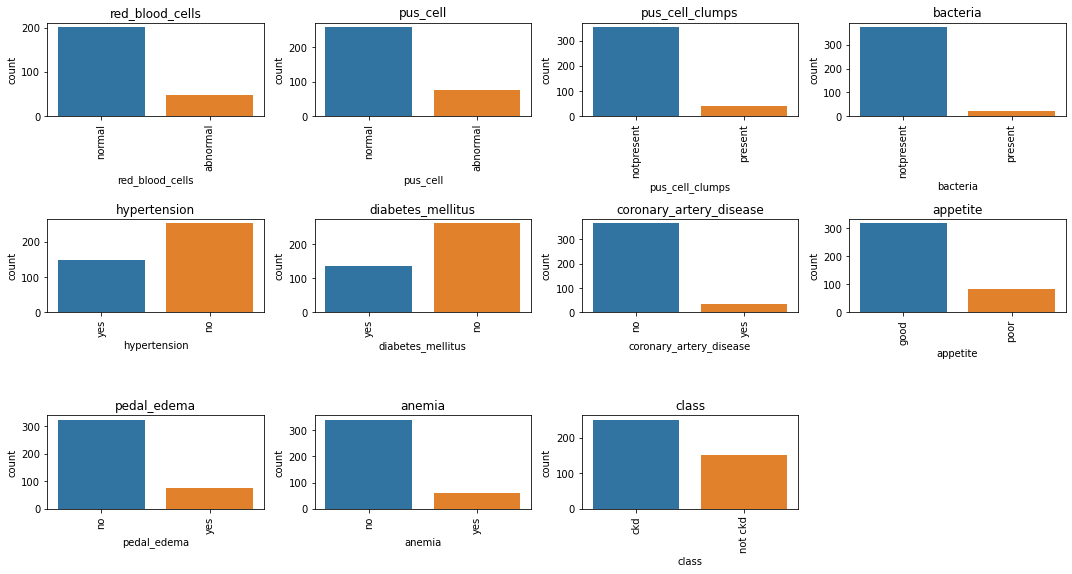

In [23]:
# Créer des graphiques à barres pour chaque colonne catégorielle
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=kidney, x=col)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


In [24]:
# Nous pouvons remarquer que certaines variables ont des valeurs abérrantes

In [25]:
# Remplissons les valeurs manquantes par la mode pour les colonnes catégorielles
def impute_mode(feature):
    mode = kidney[feature].mode()[0]
    kidney[feature] = kidney[feature].fillna(mode)

for col in cat_cols:
    impute_mode(col)

In [26]:
# Remplir les valeurs manquantes par la médiane pour les colonnes numériques
def median_imputation(feature):
    median = kidney[feature].median()
    kidney[feature].fillna(median, inplace=True)  # Utiliser inplace=True pour modifier directement le DataFrame

for col in num_cols:
    median_imputation(col)


In [27]:
kidney.isnull().sum().sort_values(ascending= False)

age                        0
potassium                  0
anemia                     0
pedal_edema                0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [28]:
kidney.duplicated().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

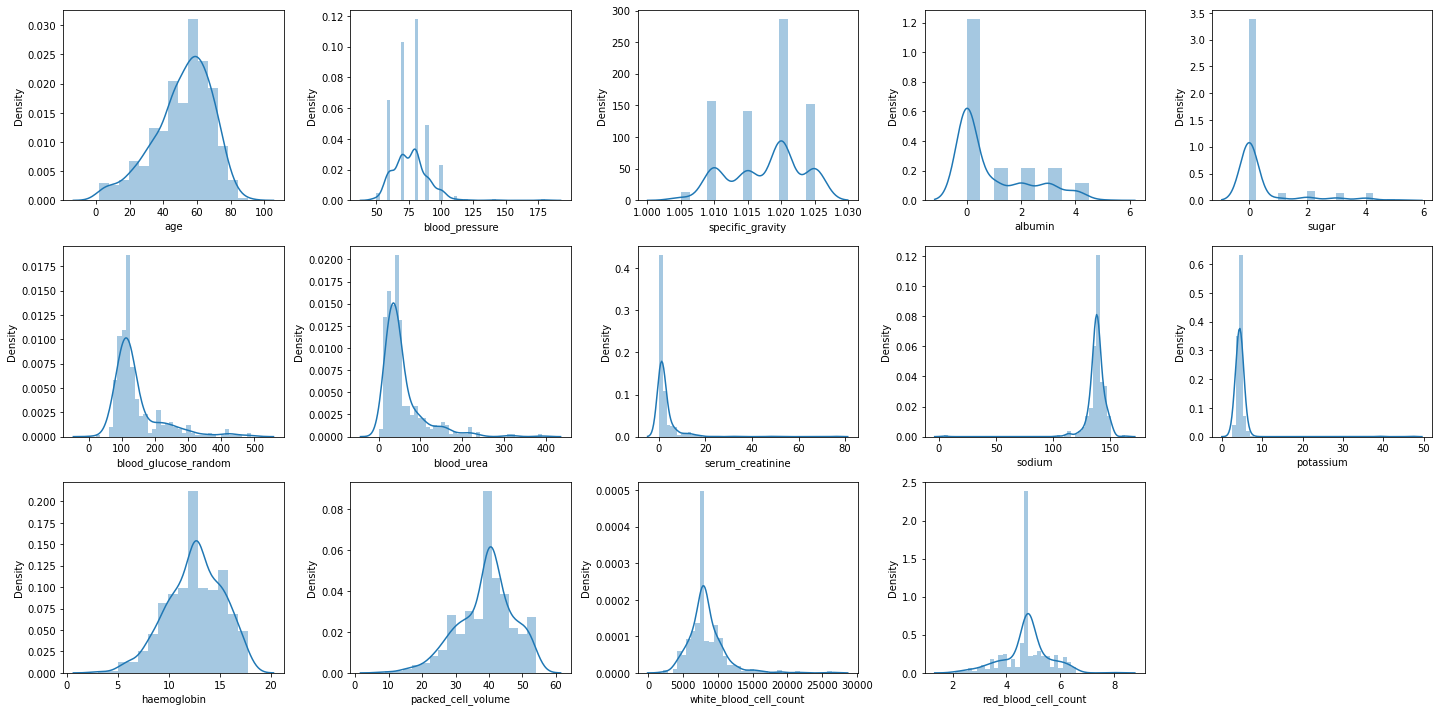

In [29]:
# checking numerical features distribution

plt.figure(figsize = (20, 10))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

D'apres ce qui precede, nous pouvons voir que les histogrammes representant les distribution du niveau de sodium, potassium hemoglobin possedent des asymétrie a droite. ce qui s'explique par le fait au cours du temps et si fonction renale du patient commene à se degrader, il lui recommander de controler voir diminuer la consommation d'aliment riche en potassium et et en sodium car les reins sont dans l'incapacité de les filtrer.
Les reins ne fonctionnant plus bien, la quantité de globules rouge aussi diminue car les reins ne fabriquent plus comme il le faudrait les plaquettes sanguines
le taux d’hémoglobine peut diminuer du à la diminution de la production des globules rouges, la destruction des gobules blancs et la perte de sang


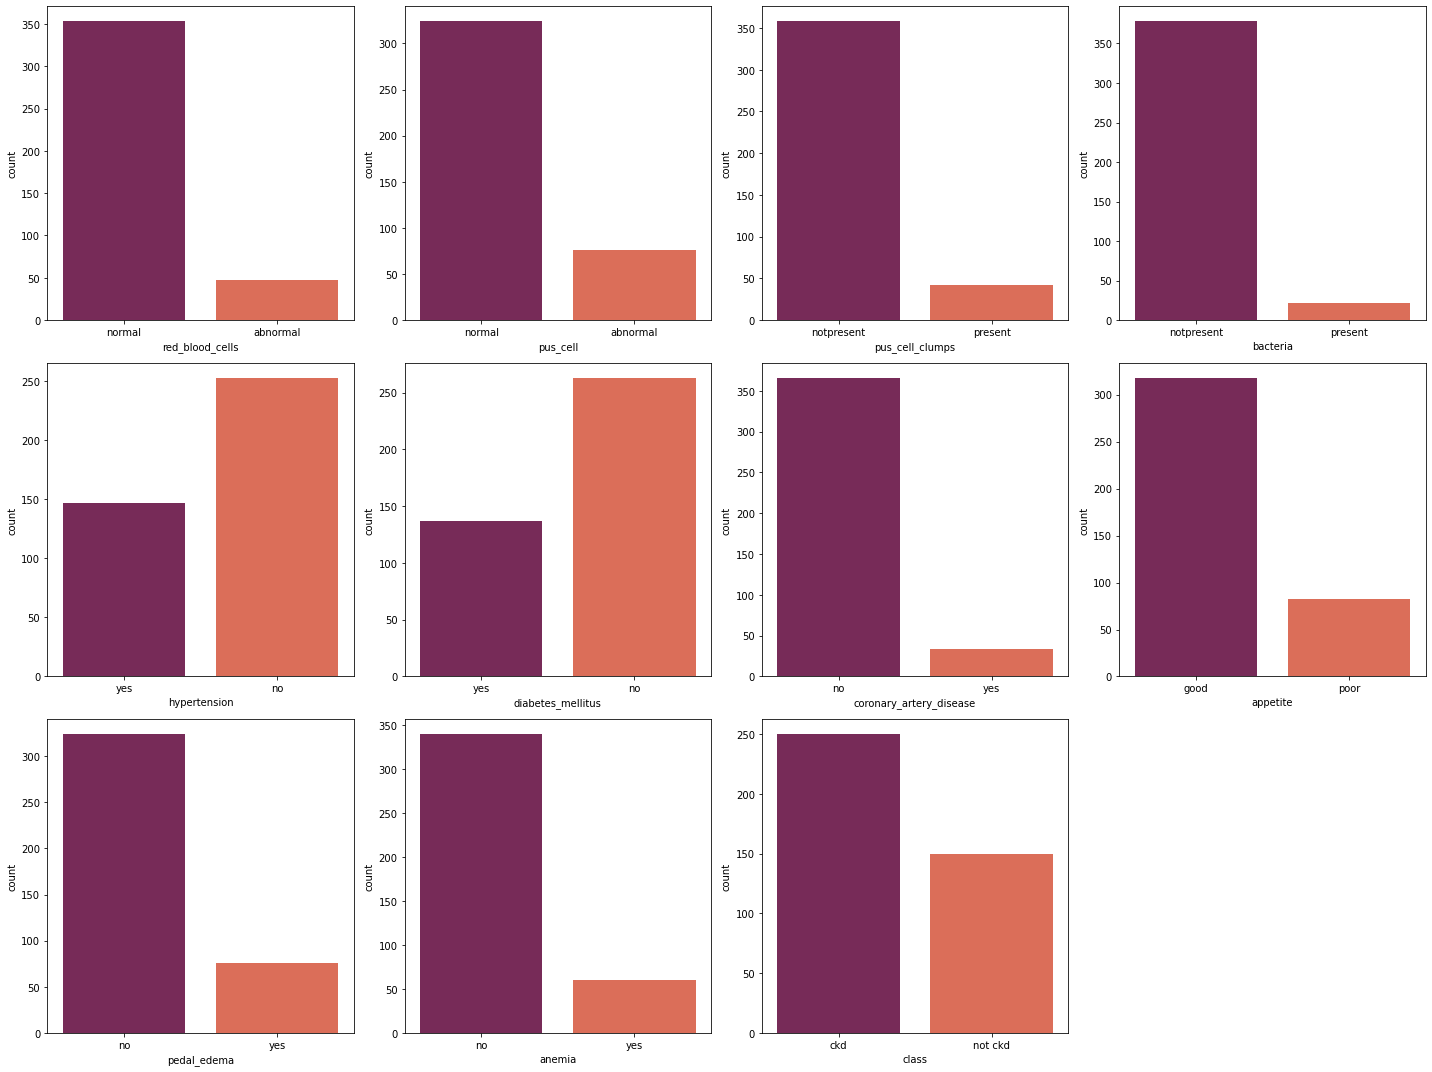

In [30]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=kidney, x=column, palette='rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()


In [31]:
ckd = len(kidney[kidney['class'] == "ckd"]['class'])
not_ckd = len(kidney[kidney['class'] == "not ckd"]['class'])
ckd_perc = round(ckd/len(kidney)*100,1)
not_ckd_perc = round(not_ckd/len(kidney)*100,1)

print('Le nombre de patients  souffrant pas d\'insuffisance rénale chronique : {} ({}%)'.format(ckd, ckd_perc))
print('Le nombre de patients  qui n\'ont pas une insuffisance rénale chronique : {} ({}%)'.format(not_ckd, not_ckd_perc))

Le nombre de patients  souffrant pas d'insuffisance rénale chronique : 250 (62.5%)
Le nombre de patients  qui n'ont pas une insuffisance rénale chronique : 150 (37.5%)


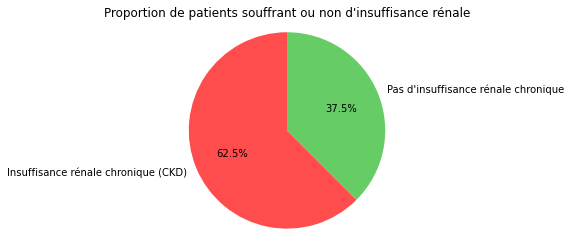

In [32]:
# Créer un diagramme à secteurs
labels = ['Insuffisance rénale chronique (CKD)', 'Pas d\'insuffisance rénale chronique']
sizes = [ckd_perc, not_ckd_perc]
colors = ['#FF4C4C', '#66CC66']  # Couleurs pour chaque part

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Assurez-vous que le diagramme soit circulaire
plt.title('Proportion de patients souffrant ou non d\'insuffisance rénale')
plt.show()

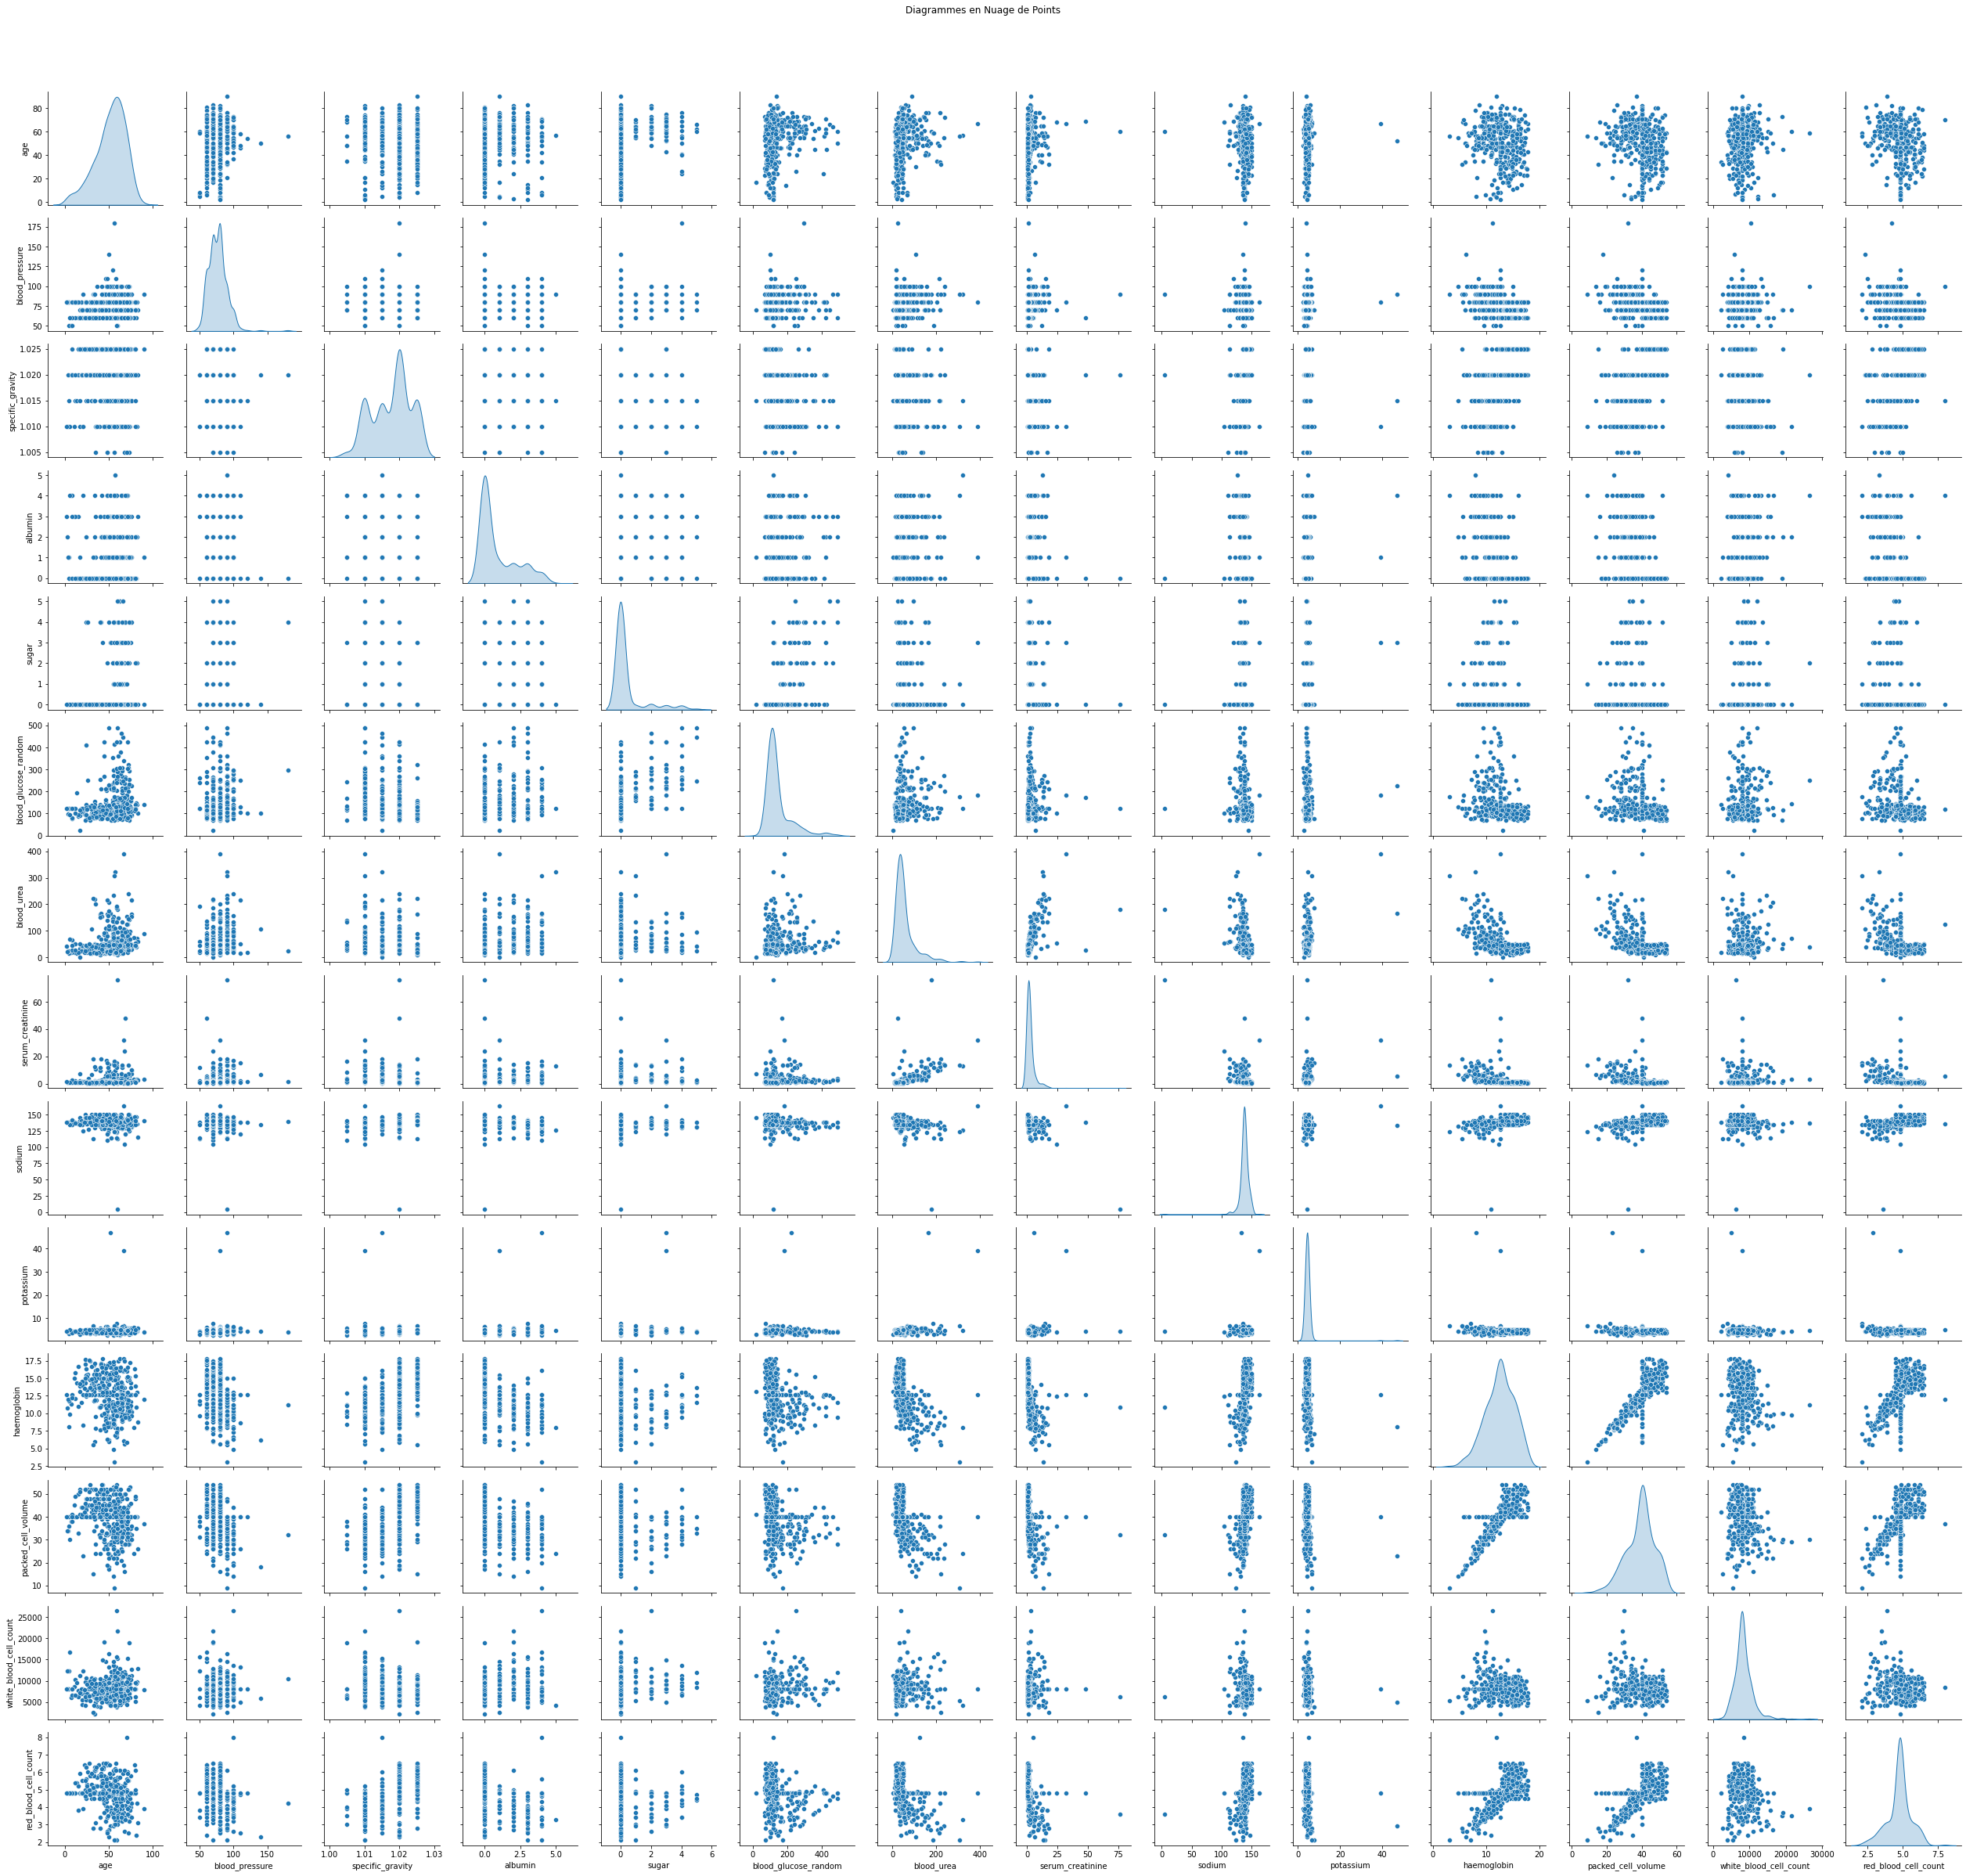

In [33]:
#Diagramme de nuage de points
sns.pairplot(kidney[num_cols], diag_kind='kde')
plt.suptitle("Diagrammes en Nuage de Points")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


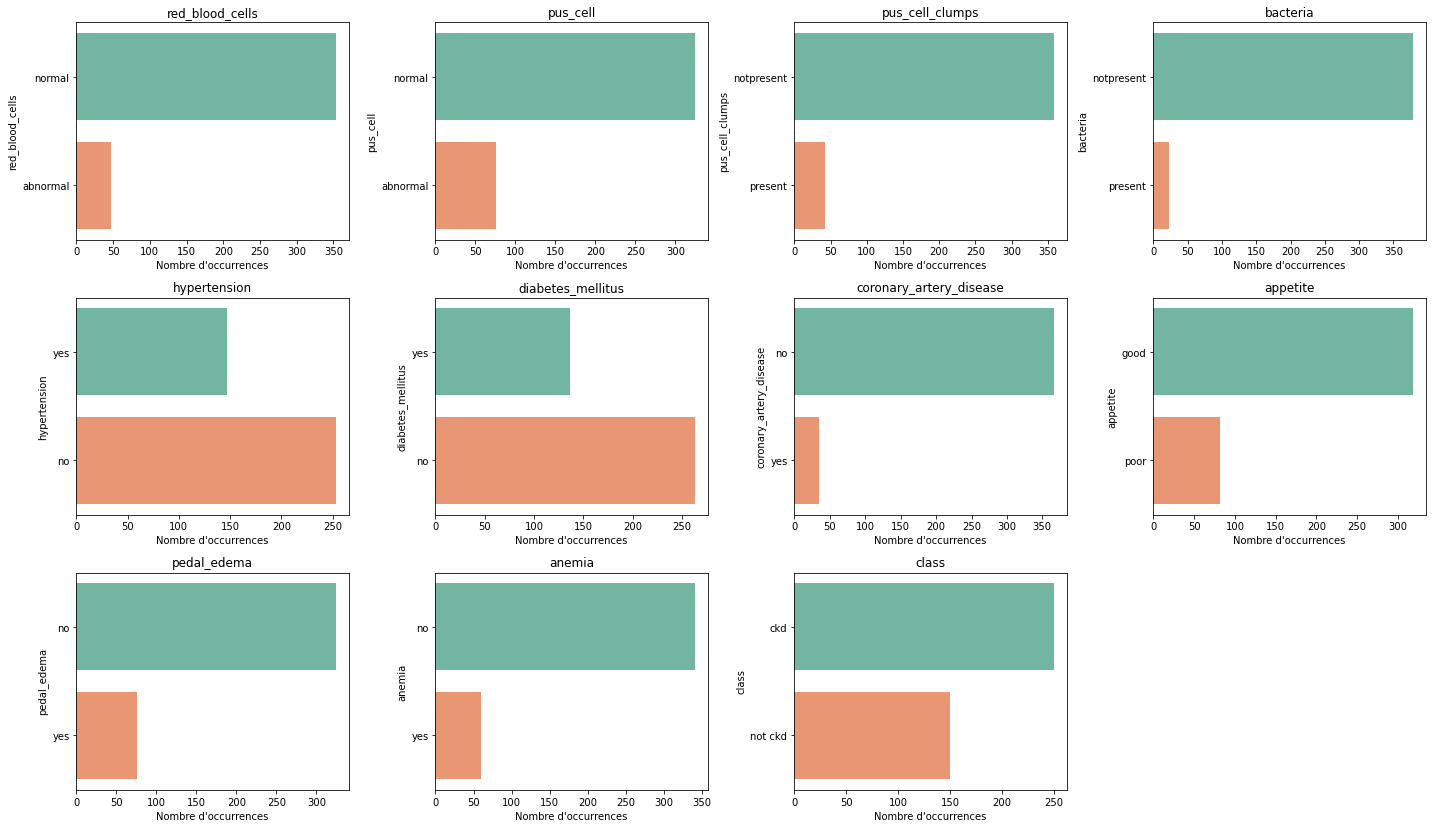

In [34]:
#Diagramme de Comptage
cat_cols = kidney.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 4, plotnumber)
        sns.countplot(y=kidney[column], palette="Set2")
        plt.xlabel("Nombre d'occurrences")
        plt.title(column)
    plotnumber += 1
plt.tight_layout()
plt.show()


In [35]:
# Normalisation et mise en echelle
from sklearn.preprocessing import MinMaxScaler

# Sélectionner les colonnes numériques à normaliser
num_cols = [col for col in kidney.columns if kidney[col].dtype != 'object']

scaler = MinMaxScaler()

# Appliquer la normalisation Min-Max aux colonnes numériques
kidney[num_cols] = scaler.fit_transform(kidney[num_cols])


In [36]:
# Encodage des variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Sélectionner les colonnes catégorielles à encoder
cat_cols = [col for col in kidney.columns if kidney[col].dtype == 'object']

label_encoder = LabelEncoder()

# Appliquer l'encodage par étiquette aux colonnes catégorielles
for col in cat_cols:
    kidney[col] = label_encoder.fit_transform(kidney[col])


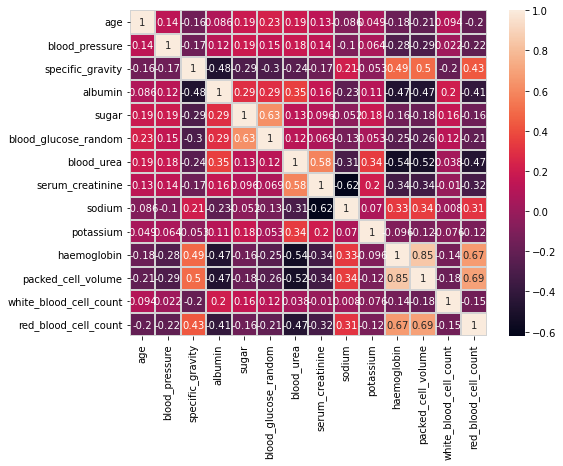

In [37]:
# Matrice des correlations
# Exclure la colonne 'tranche_age'
num_cols_without_age = [col for col in num_cols if col != 'tranche_age']

# Sélectionner uniquement les colonnes numériques
numeric_data = kidney[num_cols_without_age]

plt.figure(figsize = (8, 6))

sns.heatmap(numeric_data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()


Comme Correlation positive, nous avons:

    hemoglobin -> red_blood_cell_count,packed_cell_volume, specific_gravity
    red_blood_cell_count -> packed_cell_volume,specific_gravity
    specific_gravity -> packed_cell_volume
    blood_glucose_random -> sugar
    serum_creatinine -> blood_urea

Et pour les correlation negative

    Albumin -> hemoglobin, packed_cell_volume,specific_gravity,red_blood_cell_count
    serum_creatinine -> sodium
    blood_urea -> hemoglobin, packed_cell_volume,red_blood_cell_count



**EXPLORATION DES RELATIONS**

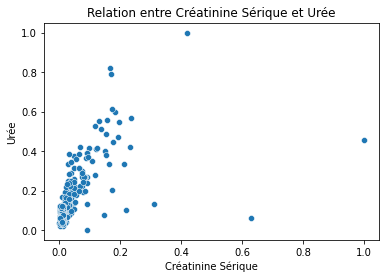

In [38]:
# RELATION CREATININE ET UREE
sns.scatterplot(x='serum_creatinine', y='blood_urea', data=kidney)
plt.title("Relation entre Créatinine Sérique et Urée")
plt.xlabel("Créatinine Sérique")
plt.ylabel("Urée")
plt.show()


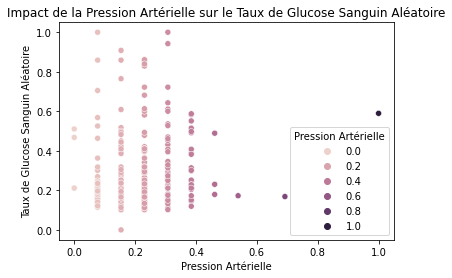

In [39]:
#Impact de la Pression Artérielle sur le Taux de Glucose Sanguin Aléatoire
sns.scatterplot(x='blood_pressure', y='blood_glucose_random', hue='blood_pressure', data=kidney)
plt.title("Impact de la Pression Artérielle sur le Taux de Glucose Sanguin Aléatoire")
plt.xlabel("Pression Artérielle")
plt.ylabel("Taux de Glucose Sanguin Aléatoire")
plt.legend(title="Pression Artérielle")
plt.show()


In [40]:
kidney.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

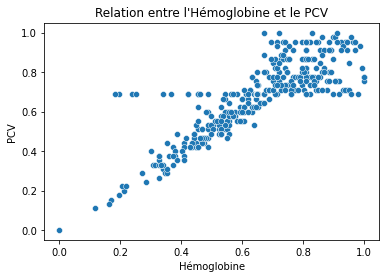

In [41]:
#Relation entre l'Hémoglobine et le Volume Globulaire Packed Cell (PCV)
sns.scatterplot(x='haemoglobin', y='packed_cell_volume', data=kidney)
plt.title("Relation entre l'Hémoglobine et le PCV")
plt.xlabel("Hémoglobine")
plt.ylabel("PCV")
plt.show()


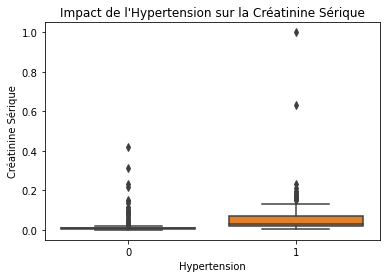

In [42]:
#Impact de la Présence d'Hypertension sur la Créatinine Sérique
sns.boxplot(x='hypertension', y='serum_creatinine', data=kidney)
plt.title("Impact de l'Hypertension sur la Créatinine Sérique")
plt.xlabel("Hypertension")
plt.ylabel("Créatinine Sérique")
plt.show()


In [43]:
kidney['class'].unique()

array([0, 1])

In [44]:
#Remplacons les valeurs  notckd, ckd and ckd/t presentesnt dans la colonne class de notre dataset
kidney['class'] = kidney['class'].replace(['ckd','not ckd'],['1','0'])
kidney['class']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

In [45]:
# jeu de données de patients atteint d'une insuffissance renale chronique
kidney_positive = kidney[kidney['class'] =='1']
kidney_positive.head()

Empty DataFrame
Columns: [age, blood_pressure, specific_gravity, albumin, sugar, red_blood_cells, pus_cell, pus_cell_clumps, bacteria, blood_glucose_random, blood_urea, serum_creatinine, sodium, potassium, haemoglobin, packed_cell_volume, white_blood_cell_count, red_blood_cell_count, hypertension, diabetes_mellitus, coronary_artery_disease, appetite, pedal_edema, anemia, class]
Index: []

[0 rows x 25 columns]

In [46]:
# jeu de données de patients n'ayant pas de insufficance renale
kidney_negative = kidney[kidney['class'] =='0']
kidney_negative.head()

Empty DataFrame
Columns: [age, blood_pressure, specific_gravity, albumin, sugar, red_blood_cells, pus_cell, pus_cell_clumps, bacteria, blood_glucose_random, blood_urea, serum_creatinine, sodium, potassium, haemoglobin, packed_cell_volume, white_blood_cell_count, red_blood_cell_count, hypertension, diabetes_mellitus, coronary_artery_disease, appetite, pedal_edema, anemia, class]
Index: []

[0 rows x 25 columns]

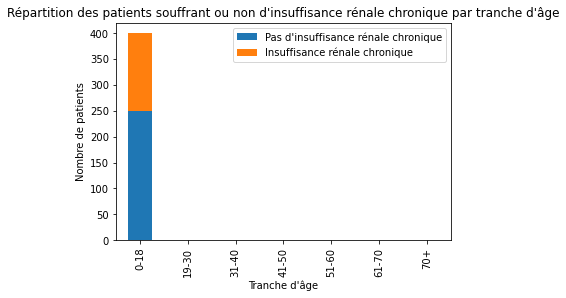

In [47]:
# Définir les catégories d'âge
bins = [0, 18, 30, 40, 50, 60, 70, 120]  # Spécifiez les limites d'âge pour chaque tranche
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '70+']
# Ajouter une colonne 'tranche_age' au dataset
kidney['tranche_age'] = pd.cut(kidney['age'], bins=bins, labels=labels, right=False)

# Regrouper par tranche d'âge et compter le nombre de patients pour chaque groupe
grouped = kidney.groupby(['tranche_age', 'class']).size().unstack()

# Plot
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de patients')
plt.title('Répartition des patients souffrant ou non d\'insuffisance rénale chronique par tranche d\'âge')
plt.legend(['Pas d\'insuffisance rénale chronique', 'Insuffisance rénale chronique'])
plt.show()




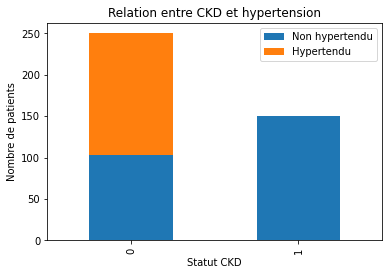

In [48]:
# Créer une table de contingence pour CKD et hypertension
contingency_table = pd.crosstab(kidney['class'], kidney['hypertension'])

# Plot
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Statut CKD')
plt.ylabel('Nombre de patients')
plt.title('Relation entre CKD et hypertension')
plt.legend(['Non hypertendu', 'Hypertendu'])
plt.show()

<AxesSubplot:xlabel='albumin', ylabel='count'>

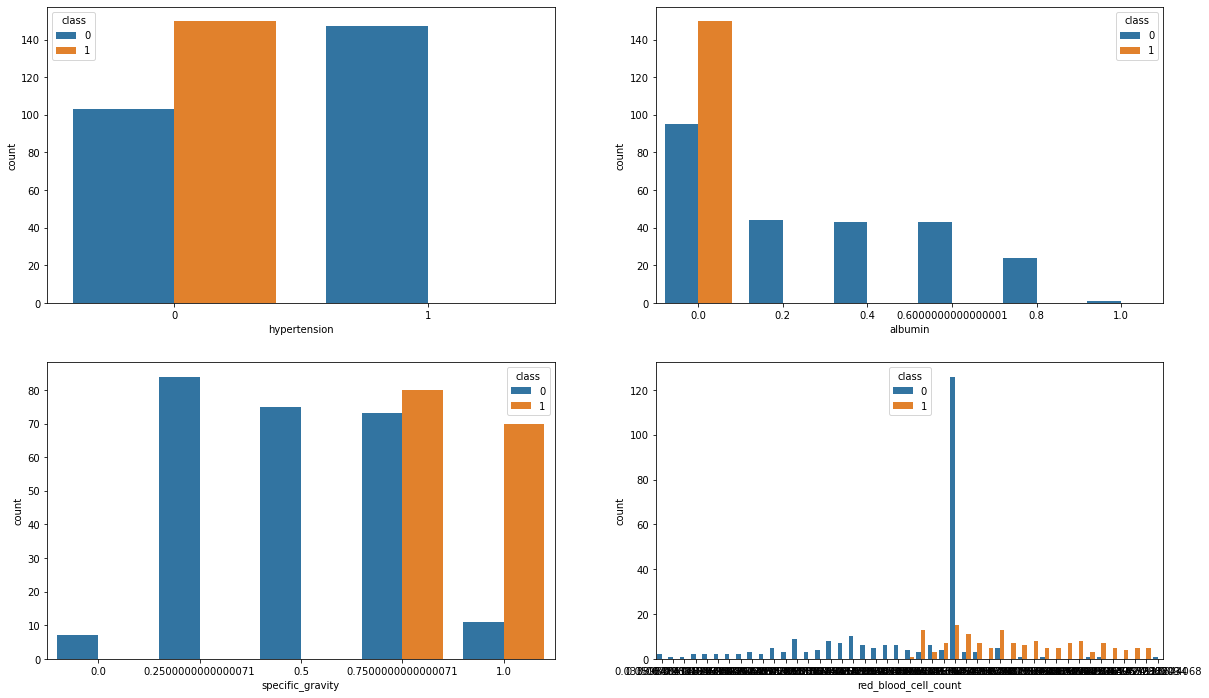

In [49]:
# RELATION ENTR
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='specific_gravity', hue = 'class',data = kidney, ax=axarr[1][0])
sns.countplot(x='red_blood_cell_count', hue = 'class',data = kidney, ax=axarr[1][1])
sns.countplot(x='hypertension', hue = 'class',data = kidney, ax=axarr[0][0])
sns.countplot(x='albumin', hue = 'class',data = kidney, ax=axarr[0][1])

Text(0.5, 0, 'Blood urea Levels (mg/dL)')

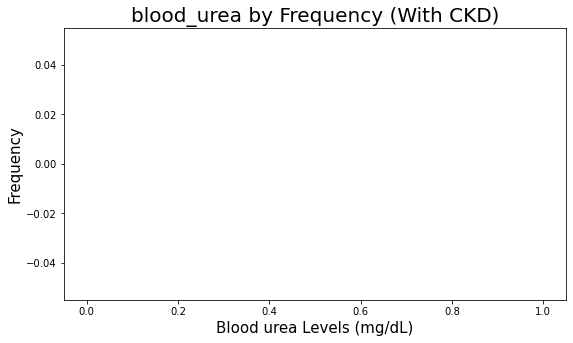

In [50]:
# Visualisation de la presence d'urée dans le sang des patients CKD
plt.figure(figsize = (9, 5))
plt.hist(kidney_positive['blood_urea'],histtype='stepfilled',bins=20, color ='red')
plt.title('blood_urea by Frequency (With CKD)', size = 20)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Blood urea Levels (mg/dL)', size = 15)

Text(0.5, 0, 'Blood urea Levels (mg/dL)')

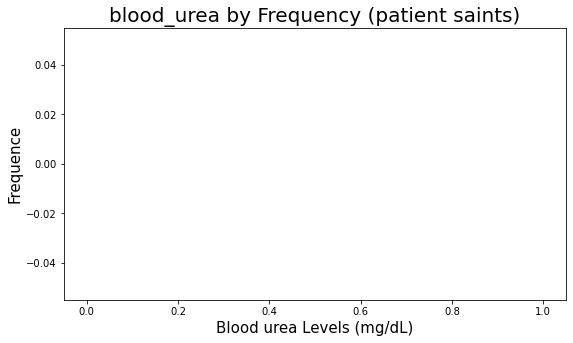

In [51]:
# Visualisation de la presence d'urée dans le sang des patients CKD
plt.figure(figsize = (9, 5))
plt.hist(kidney_negative['blood_urea'],histtype='stepfilled',bins=20, color ='green')
plt.title('blood_urea by Frequency (patient saints)', size = 20)
plt.ylabel('Frequence', size = 15)
plt.xlabel('Blood urea Levels (mg/dL)', size = 15)

Text(0.5, 0, 'Serum Creatinine Levels (mg/dL)')

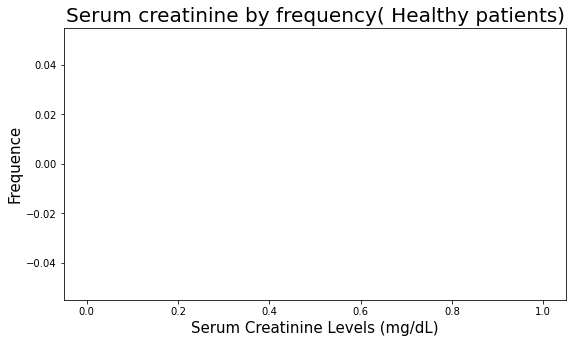

In [52]:
# Visualisation de la presence de creatinine dans le sang des patients CKD
plt.figure(figsize = (9, 5))
plt.hist(kidney_negative['serum_creatinine'],histtype='stepfilled',bins=20, color ='green')
plt.title('Serum creatinine by frequency( Healthy patients)', size = 20)
plt.ylabel('Frequence', size = 15)
plt.xlabel('Serum Creatinine Levels (mg/dL)', size = 15)

Text(0.5, 0, 'Serum Creatinine Levels (mg/dL)')

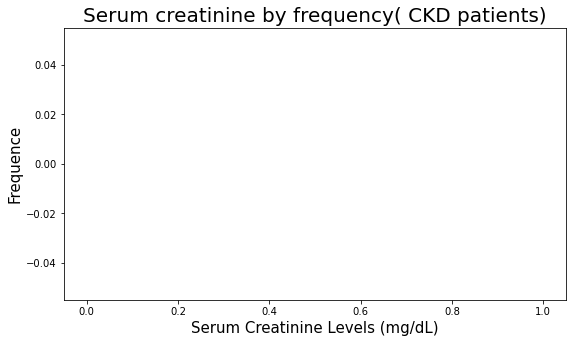

In [53]:
# Visualisation de la presence de creatinine dans le sang des patients CKD
plt.figure(figsize = (9, 5))
plt.hist(kidney_positive['serum_creatinine'],histtype='stepfilled',bins=20, color ='red')
plt.title('Serum creatinine by frequency( CKD patients)', size = 20)
plt.ylabel('Frequence', size = 15)
plt.xlabel('Serum Creatinine Levels (mg/dL)', size = 15)

Text(0.5, 0, 'red blood cell count (millions/cmm)')

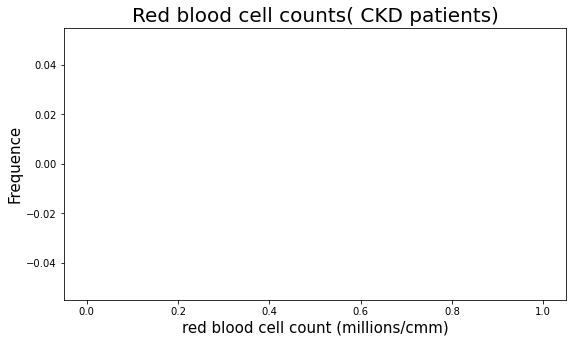

In [54]:
# Visualisation de la presence de globules rouge des patients CKD
plt.figure(figsize = (9, 5))
plt.hist(kidney_positive['red_blood_cell_count'],histtype='stepfilled',bins=20, color ='red')
plt.title('Red blood cell counts( CKD patients)', size = 20)
plt.ylabel('Frequence', size = 15)
plt.xlabel('red blood cell count (millions/cmm)', size = 15)

Text(0.5, 0, 'Red Blood cell count Levels (millions/cmm)')

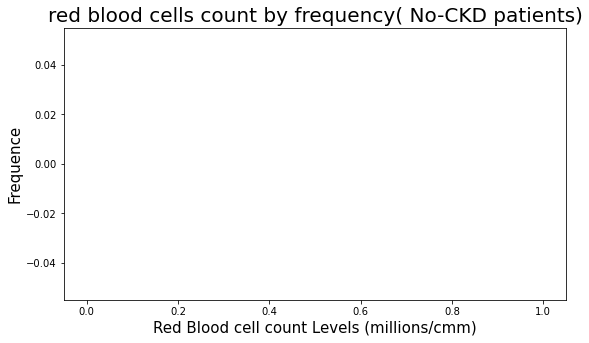

In [55]:
# Visualisation de la presence de globules rouge des patients No-CKD
plt.figure(figsize = (9, 5))
plt.hist(kidney_negative['red_blood_cell_count'],histtype='stepfilled',bins=20, color ='green')
plt.title('red blood cells count by frequency( No-CKD patients)', size = 20)
plt.ylabel('Frequence', size = 15)
plt.xlabel('Red Blood cell count Levels (millions/cmm)', size = 15)

In [56]:

#plt.scatter(kidney['red_blood_cell_count'],kidney['packed_cell_volume'])
df = kidney
fig = px.scatter(df, x="red_blood_cell_count", y="packed_cell_volume", color="class")
fig.show()


In [57]:
fig = px.bar(kidney, x="diabetes_mellitus", y="blood_glucose_random",color='class', barmode='group',height=400)
fig.show()

In [58]:
fig = px.bar(kidney, x="age", y="blood_glucose_random",color='class', barmode='group',height=400)
fig.show()

In [59]:
fig = px.bar(kidney, x="hypertension", y="blood_pressure",color='class', barmode='group',height=400)
fig.show()

# ANALYSE EXPLORATOIRE DES DONNEES


In [60]:
# Méthode basée sur la variance

from sklearn.feature_selection import VarianceThreshold

# Sélectionner les colonnes à inclure dans la sélection des caractéristiques
feature_cols = [col for col in kidney.columns if col != 'class' and col != 'tranche_age']

selector = VarianceThreshold(threshold=0.1)  # Ajustez le seuil selon vos besoins

# Appliquer la sélection basée sur la variance
selected_features = selector.fit_transform(kidney[feature_cols])

# Afficher les noms des variables sélectionnées
selected_feature_names = [feature_cols[i] for i, support in enumerate(selector.get_support()) if support]
print("Noms des variables sélectionnées:", selected_feature_names)


Noms des variables sélectionnées: ['red_blood_cells', 'pus_cell', 'hypertension', 'diabetes_mellitus', 'appetite', 'pedal_edema', 'anemia']


In [61]:
#Méthode basée sur les tests statistiques
from sklearn.feature_selection import SelectKBest, f_classif

# Sélectionner les colonnes à inclure dans la sélection des caractéristiques
feature_cols = [col for col in kidney.columns if col != 'class' and  col != 'tranche_age']

selector = SelectKBest(score_func=f_classif, k=5)  # Ajustez k selon vos besoins

# Appliquer la sélection basée sur les tests statistiques
selected_features = selector.fit_transform(kidney[feature_cols], kidney['class'])

# Afficher les noms des variables sélectionnées
selected_feature_names = [feature_cols[i] for i, support in enumerate(selector.get_support()) if support]
print("Noms des variables sélectionnées:", selected_feature_names)


Noms des variables sélectionnées: ['specific_gravity', 'haemoglobin', 'packed_cell_volume', 'red_blood_cell_count', 'hypertension']


In [62]:
# Méthode basée sur les modèles
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Sélectionner les colonnes à inclure dans la sélection des caractéristiques
feature_cols = [col for col in kidney.columns if col != 'class'  and col != 'tranche_age']

model = RandomForestClassifier()  # Utiliser un modèle approprié
selector = SelectFromModel(model)

# Appliquer la sélection basée sur les modèles
selected_features = selector.fit_transform(kidney[feature_cols], kidney['class'])

# Afficher les noms des variables sélectionnées
selected_feature_names = [feature_cols[i] for i, support in enumerate(selector.get_support()) if support]
print("Noms des variables sélectionnées:", selected_feature_names)


Noms des variables sélectionnées: ['specific_gravity', 'albumin', 'serum_creatinine', 'haemoglobin', 'packed_cell_volume', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus']


Nous voulons a present observer si il ya une tendance entre l'age du patient et le fait qu'il ait ou pas une insuffissance renale chronique.
Pour ce faire, nous utilisons la visualisation par violon de la bibliotheque seaborn pour les valeurs categorielles.
1 signifie qu'un patient a une insuffisance rénale chronique et 0 sinon.

Nous remarquons une forte correlation entre les globules rouges et les hemarocrite.
plus le volume de globule rouge augmente plus l"hamtocrte aussi augmente



# CONSTRUCTION DU MODELE

In [63]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
kidney = kidney.apply(LabelEncoder().fit_transform)
kidney.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0   40               3                 3        1      0                1   
1    5               0                 3        4      0                1   
2   54               3                 1        2      3                1   
3   40               2                 0        4      0                1   
4   43               3                 1        2      0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         1                0         0                    48  ...   
1         1                0         0                    48  ...   
2         1                0         0                   140  ...   
3         0                1         0                    44  ...   
4         1                0         0                    33  ...   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0                      35                    30             1   
1                      19                    26             0   
2                      33                    26             0   
3                      25                    17             1   
4                      31                    24             0   

   diabetes_mellitus  coronary_artery_disease  appetite  pedal_edema  anemia  \
0                  1                        0         0            0       0   
1                  0                        0         0            0       0   
2                  1                        0         1            0       1   
3                  0                        0         1            1       1   
4                  0                        0         0            0       0   

   class  tranche_age  
0      0            0  
1      0            0  
2      0            0  
3      0            0  
4      0            0  

[5 rows x 26 columns]

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Séparer les caractéristiques et la variable cible
X = kidney.drop('class', axis=1)
y = kidney['class']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur les données de test
y_pred = model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Précision du modèle:", accuracy)
print("Rapport de classification:\n", classification_rep)
print("Matrice de confusion:\n", conf_matrix)
print("F-score:", f_score)
print("Rappel:", recall)

Précision du modèle: 1.0
Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Matrice de confusion:
 [[52  0]
 [ 0 28]]
F-score: 1.0
Rappel: 1.0


In [65]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Separate features and target
#X = data.iloc[:, :-1] # Features
#y = data.iloc[:, -1] # Target

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # Naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  # Print 10 best features

                     Specs        Score
14             haemoglobin  2498.768230
11        serum_creatinine  2230.883298
10              blood_urea  1681.635240
9     blood_glucose_random  1593.204938
15      packed_cell_volume   460.305458
17    red_blood_cell_count   360.743328
3                  albumin   216.000000
0                      age   139.123323
12                  sodium   130.259918
16  white_blood_cell_count   103.801408


  ** Précision du modèle (Accuracy)** : C'est la proportion des prédictions correctes par rapport au nombre total d'échantillons. Dans ce cas, la précision est de 0.9625, ce qui signifie que le modèle a correctement prédit la classe pour environ 96.25% des échantillons.

  **Rapport de classification **: Cette partie du résultat fournit plusieurs mesures pour évaluer les performances du modèle pour chaque classe (0 et 1) ainsi que les mesures globales (macro avg et weighted avg).

  **Précision** : C'est la proportion des vrais positifs parmi les vrais positifs et les faux positifs. Par exemple, pour la classe 0, la précision est de 0.98, ce qui signifie que parmi toutes les prédictions que le modèle a fait pour la classe 0, environ 98% étaient correctes.

   **Rappel (Recall) :** C'est la proportion des vrais positifs parmi les vrais positifs et les faux négatifs. Par exemple, pour la classe 1, le rappel est de 0.97, ce qui signifie que le modèle a capturé environ 97% des vrais échantillons de la classe 1.

  **F-score :** C'est une métrique qui combine la précision et le rappel. C'est particulièrement utile lorsque les classes sont déséquilibrées. Un F-score plus élevé indique un bon équilibre entre précision et rappel.

   Support : C'est le nombre d'échantillons réels dans chaque classe.

 ** Matrice de confusion** : C'est une matrice qui montre les prédictions faites par le modèle par rapport aux classes réelles. La matrice est organisée comme suit :
        En haut à gauche : Vrais négatifs (TN) : 48 échantillons ont été correctement prédits comme classe 0.
        En haut à droite : Faux positifs (FP) : 2 échantillons ont été prédits comme classe 1 alors qu'ils sont en réalité de classe 0.
        En bas à gauche : Faux négatifs (FN) : 1 échantillon a été prédit comme classe 0 alors qu'il est en réalité de classe 1.
        En bas à droite : Vrais positifs (TP) : 29 échantillons ont été correctement prédits comme classe 1.

In [ ]:
import pickle
# Sauvegarde du modèle au format pickle
with open('model_RegLog.pkl', 'wb') as file:
    pickle.dump(model, file)

# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"La précision de l'algorthme de KNN est {accuracy_score(y_train, knn.predict(X_train))}")
print(f"La précision du test de KNN est {knn_acc} \n")

print(f" La matrice de Confusion  :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Rapport de classement :- \n {classification_report(y_test, knn.predict(X_test))}")

# SVC

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Créer un modèle SVM
model = SVC(kernel='linear')  # Utilisez le noyau approprié en fonction de vos données

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur les données de test
y_pred = model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Précision du modèle SVM:", accuracy)
print("Rapport de classification:\n", classification_rep)


In [ ]:
SVCmodel=  SVC(probability=True)
SVCmodel.fit(X_train, y_train)
trainscore =  SVCmodel.score(X_train,y_train)
testscore =  SVCmodel.score(X_test,y_test)

y_pred =  SVCmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

# TREE DECISION


In [ ]:
DTmodel=  DecisionTreeClassifier(max_depth=3)
DTmodel.fit(X_train, y_train)
trainscore =  DTmodel.score(X_train,y_train)
testscore =  DTmodel.score(X_test,y_test)

y_pred =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

# RANDOM FOREST

In [ ]:
#------------------------Random Forest-----------------------
RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=3)
RFmodel.fit(X_train, y_train)
trainscore =  RFmodel.score(X_train,y_train)
testscore =  RFmodel.score(X_test,y_test)

y_pred =  RFmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

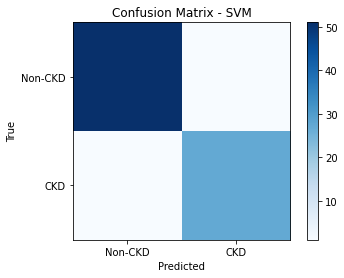

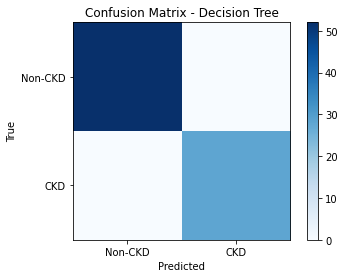

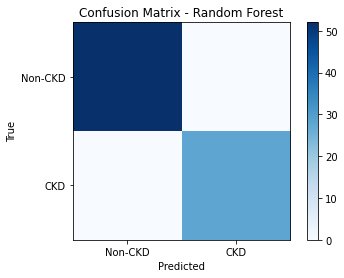

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



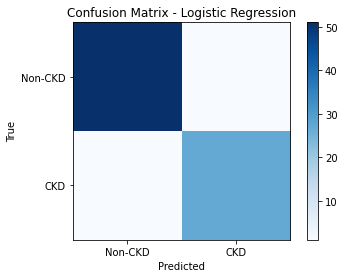

                 Model  Accuracy  F1 Score    Recall
0                  SVM     0.975  0.964286  0.964286
1        Decision Tree     1.000  1.000000  1.000000
2        Random Forest     1.000  1.000000  1.000000
3  Logistic Regression     0.975  0.964286  0.964286


In [82]:
# Initialiser les modèles
svm_model = SVC()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
logistic_model = LogisticRegression()  # Ajout de la régression logistique

# Séparer les caractéristiques et la variable cible
X = kidney.drop('class', axis=1)
y = kidney['class']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Définir une liste de modèles
models = [svm_model, tree_model, forest_model, logistic_model]  # Ajout de la régression logistique
model_names = ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression']  # Ajout de la régression logistique

# Créer des dictionnaires pour stocker les résultats
results = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'Recall': []}

# Boucle sur les modèles
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Recall'].append(recall)

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.title(f'Confusion Matrix - {name}')
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xticks([0, 1], ['Non-CKD', 'CKD'])
    plt.yticks([0, 1], ['Non-CKD', 'CKD'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Afficher les performances des modèles
print(results_df)

# ENTRAINEMENT DU MODELE AVEC LES VARIABLES EXPLICATIVES SELECTIONNEES

In [76]:
# Séparer les caractéristiques et la variable cible
X1 = kidney[['age', 'albumin','red_blood_cell_count','blood_glucose_random', 'blood_urea', 'serum_creatinine', 'white_blood_cell_count','packed_cell_volume', 'haemoglobin',  'sodium']]
y = kidney['class']

# Diviser les données en ensembles d'entraînement et de test
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42,stratify=y)

y_test.value_counts()/80

# Normalisation des caractéristiques
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

**REGRESSION LOGISTIQUE**


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score

# Créer un modèle de régression logistique
model = LogisticRegression()
model.fit(X1_train, y_train)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Précision du modèle:", accuracy)
print("Rapport de classification:\n", classification_rep)
print("Matrice de confusion:\n", conf_matrix)
print("F-score:", f_score)
print("Rappel:", recall)







Précision du modèle: 0.975
Rapport de classification:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

Matrice de confusion:
 [[51  1]
 [ 1 27]]
F-score: 0.9642857142857143
Rappel: 0.9642857142857143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**SVM**

In [73]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Créer un modèle SVM
svm_model = SVC(kernel='linear', C=1.0)

# Entraîner le modèle sur les données d'entraînement
svm_model.fit(X1_train, y_train)

# Prédire les étiquettes sur les données de test
y_pred = svm_model.predict(X1_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Précision du modèle:", accuracy)
print("Rapport de classification:\n", classification_rep)
print("Matrice de confusion:\n", conf_matrix)


Précision du modèle: 0.975
Rapport de classification:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      0.97      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

Matrice de confusion:
 [[49  1]
 [ 1 29]]


**Tree decision**

In [74]:
DTmodel=  DecisionTreeClassifier(max_depth=3)
DTmodel.fit(X1_train, y_train)
trainscore =  DTmodel.score(X1_train,y_train)
testscore =  DTmodel.score(X1_test,y_test)

y_pred =  DTmodel.predict(X1_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 f1 score:  0.9310344827586207 

[[49  1]
 [ 3 27]]
 precision score:  0.9642857142857143 

 recall score:  0.9 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.96      0.90      0.93        30

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



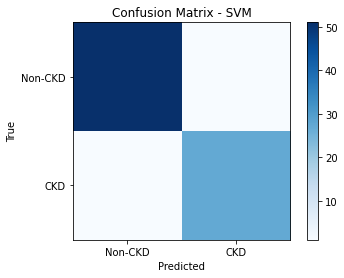

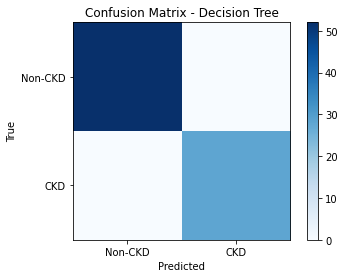

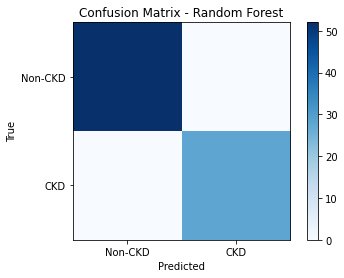

           Model  Accuracy  F1 Score    Recall
0            SVM     0.975  0.964286  0.964286
1  Decision Tree     1.000  1.000000  1.000000
2  Random Forest     1.000  1.000000  1.000000


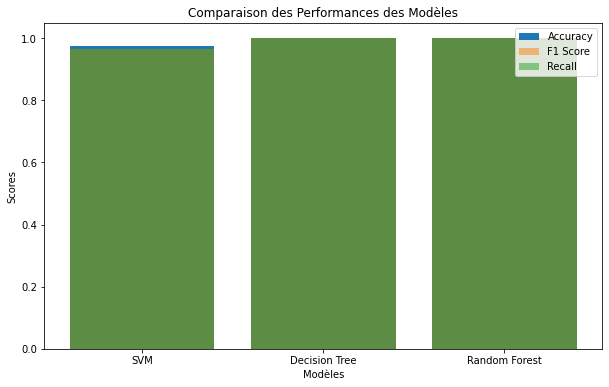

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt



# Diviser les données en ensemble d'entraînement et ensemble de test
X1 = kidney[['age', 'albumin','red_blood_cell_count','blood_glucose_random', 'blood_urea', 'serum_creatinine', 'white_blood_cell_count','packed_cell_volume', 'haemoglobin',  'sodium']]
y = kidney['class']
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Initialiser les modèles
svm_model = SVC()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
logistic_model = LogisticRegression()

# Définir une liste de modèles
models = [svm_model, tree_model, forest_model]
model_names = ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression']

# Créer des dictionnaires pour stocker les résultats
results = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'Recall': []}

# Boucle sur les modèles
for model, name in zip(models, model_names):
    model.fit(X1_train, y_train)
    y_pred = model.predict(X1_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Recall'].append(recall)

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.title(f'Confusion Matrix - {name}')
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xticks([0, 1], ['Non-CKD', 'CKD'])
    plt.yticks([0, 1], ['Non-CKD', 'CKD'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Afficher les performances des modèles
print(results_df)

# Vous pouvez également créer des graphiques pour visualiser les performances
plt.figure(figsize=(10, 6))
plt.title('Comparaison des Performances des Modèles')
plt.bar(results_df['Model'], results_df['Accuracy'], label='Accuracy')
plt.bar(results_df['Model'], results_df['F1 Score'], label='F1 Score', alpha=0.5)
plt.bar(results_df['Model'], results_df['Recall'], label='Recall', alpha=0.5)
plt.xlabel('Modèles')
plt.ylabel('Scores')
plt.legend()
plt.show()


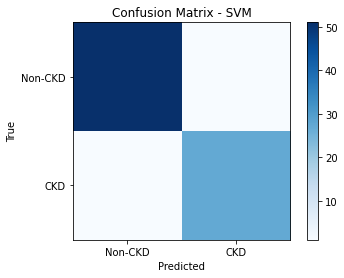

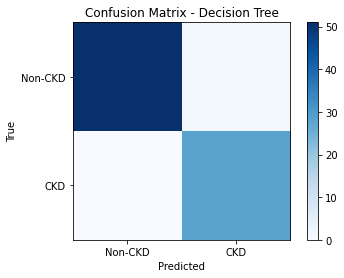

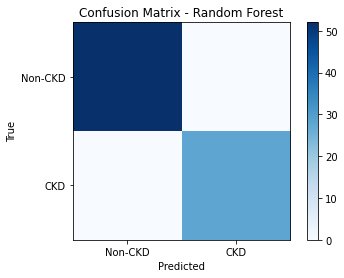

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



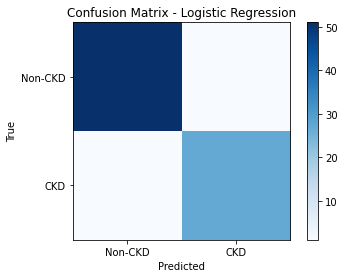

                 Model  Accuracy  F1 Score    Recall
0                  SVM    0.9750  0.964286  0.964286
1        Decision Tree    0.9875  0.982456  1.000000
2        Random Forest    1.0000  1.000000  1.000000
3  Logistic Regression    0.9750  0.964286  0.964286


In [80]:
# Initialiser les modèles
svm_model = SVC()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
logistic_model = LogisticRegression()  # Ajout de la régression logistique

# Définir une liste de modèles
models = [svm_model, tree_model, forest_model, logistic_model]  # Ajout de la régression logistique
model_names = ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression']  # Ajout de la régression logistique

# Créer des dictionnaires pour stocker les résultats
results = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'Recall': []}

# Boucle sur les modèles
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Recall'].append(recall)

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.title(f'Confusion Matrix - {name}')
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xticks([0, 1], ['Non-CKD', 'CKD'])
    plt.yticks([0, 1], ['Non-CKD', 'CKD'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Afficher les performances des modèles
print(results_df)